# The Music of the Sphere: The Planck CMB Temperature Map, and its Spherical Harmonic Decomposition

*Phil Marshall and Hans-Christian Eriksen, August 2015*

In this notebook we download the Commander Planck CMB map, visualize it, decompose it into Spherical Harmonics, and look at the first few components.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import beatbox
import healpy as hp
import os.path

## 1. The Planck CMB Temperature Map

The 2015 Planck CMB and astrophysical component maps are described on the [project wiki, here](http://wiki.cosmos.esa.int/planckpla/index.php/CMB_and_astrophysical_component_maps). We use the ["COMMANDER-Ruler"](http://wiki.cosmos.esa.int/planckpla/index.php/CMB_and_astrophysical_component_maps#COMMANDER-Ruler) low resolution map, and its associated mask. This map contains the pixel values at the peak of the posterior PDF. Later, we will investigate samples drawn from this distribution: these capture the uncertainty in the Planck low resolution CMB temperature map. The FITS file containing this map is 37Mb in size, so might take a few minutes to download.

In [3]:
Tmapfile = "COM_CompMap_CMB-commrul_0256_R1.00.fits"

if not os.path.isfile(Tmapfile):
    URL = "http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID="+Tmapfile
    !wget -O "$Tmapfile" "$URL"

Good. Now, let's read the T map in to our "beatbox" Universe model, and take a look at it.

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING


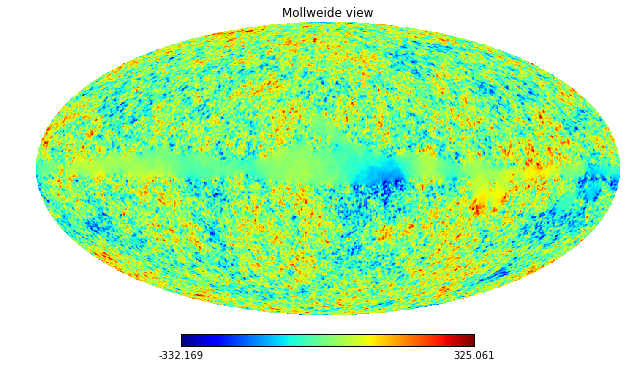

In [4]:
We = beatbox.Universe()
We.read_in_CMB_T_map(from_this=Tmapfile)
We.show_CMB_T_map(from_perspective_of="observer")

## 2. Spherical harmonic decomposition

Let's see what the first few spherical harmonics look like. First we carry out the decomposition using `healpy`'s `map2alm` function - and then we can project out the components.

In [5]:
We.decompose_T_map_into_spherical_harmonics()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


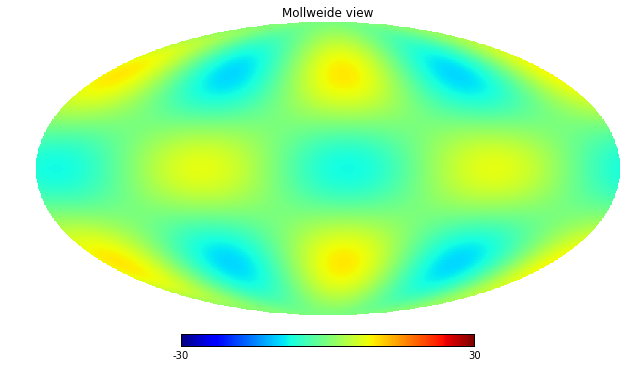

In [7]:
We.show_one_spherical_harmonic_of_CMB_T_map(l=4,m=2,max=30)